In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TRAITEMENTS PRELIMINAIRES DES DONNEES

## 1. Nettoyage de données du dataframe

In [26]:
df = pd.read_csv('dataverse_files/Avian_influenza_wildlife_surveillance_France_2016_to_2022.csv')
df.head()

,uid,ID,Results_of_analysis,Bird_species_FR,CD_nom,Bird_species_LAT,Bird_family_latin,Code_INSEE_municipality,Obs_date,Zone_of_enhanced_surveillance_ZRP,Name_ZRP,Nb_birds_lab_pools,X_Municipality_centroid_Lambert93,Y_Municipality_centroid_Lambert93
0,3887,44_20221116_B,HP,Goeland_argente,3302,Larus_argentatus,Laridae,44211,18/08/2022,Yes,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
1,3888,26_20220321_A,negative,Milan_royal,2846,Falco_milvus,Accipitridae,26064,20/01/2022,No,NaN,1.0,858600,6425700
2,3903,41_20180724_A,negative,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,22/05/2018,No,NaN,1.0,574450,6684932
3,3901,31_20210304_A,negative,Pigeon_biset,3420,Columba_livia,Columbidae,31488,03/02/2021,No,NaN,1.0,578848,6286405
4,3892,07_20220518_A,negative,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,29/03/2022,Yes,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uid                                4076 non-null   int64  
 1   ID                                 4076 non-null   object 
 2   Results_of_analysis                4076 non-null   object 
 3   Bird_species_FR                    4076 non-null   object 
 4   CD_nom                             4076 non-null   int64  
 5   Bird_species_LAT                   4076 non-null   object 
 6   Bird_family_latin                  4062 non-null   object 
 7   Code_INSEE_municipality            4076 non-null   object 
 8   Obs_date                           4076 non-null   object 
 9   Zone_of_enhanced_surveillance_ZRP  4076 non-null   object 
 10  Name_ZRP                           1901 non-null   object 
 11  Nb_birds_lab_pools                 4069 non-null   float

In [28]:
df.describe()

,uid,CD_nom,Nb_birds_lab_pools,X_Municipality_centroid_Lambert93,Y_Municipality_centroid_Lambert93
count,4076.000000,4076.000000,4069.000000,4.076000e+03,4.076000e+03
mean,2052.422964,37557.934985,1.517080,6.006043e+05,6.709835e+06
std,1202.335989,129386.864672,1.538115,2.428472e+05,2.376212e+05
min,1.000000,0.000000,1.000000,1.033080e+05,6.109485e+06
25%,1019.750000,2506.000000,1.000000,3.860240e+05,6.546843e+06
50%,2038.500000,2708.000000,1.000000,6.041950e+05,6.754640e+06
75%,3057.250000,3342.000000,1.000000,8.124670e+05,6.875424e+06
max,4770.000000,895998.000000,19.000000,1.236284e+06,7.108280e+06


In [29]:
# CHANGEMENT DE L'INDEX DU DATAFRAME

print(len(df['uid'].unique()))
print(df.index)

#On peut donc prendre la colonne 'uid' comme index

df = df.set_index('uid')

4076
RangeIndex(start=0, stop=4076, step=1)


In [30]:
# SUPPRESSION DES COLONNES INUTILES

df = df.drop('ID',axis=1)

In [31]:
# RENOMMAGE DES COLONNES

df.columns = ['Test_PCR_positif','Espece_nom_fr','Espece_ID','Espece_nom_latin','Famille_nom_latin','Commune_ID','Date_observation','ZRP','ZRP_Nom','Nombre_oiseaux_analyses','X_localisation','Y_localisation']
# 'ZRP' = 'Zone à Risque Particulier', définies au niveau gouvernemental

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 3887 to 4625
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Test_PCR_positif         4076 non-null   object 
 1   Espece_nom_fr            4076 non-null   object 
 2   Espece_ID                4076 non-null   int64  
 3   Espece_nom_latin         4076 non-null   object 
 4   Famille_nom_latin        4062 non-null   object 
 5   Commune_ID               4076 non-null   object 
 6   Date_observation         4076 non-null   object 
 7   ZRP                      4076 non-null   object 
 8   ZRP_Nom                  1901 non-null   object 
 9   Nombre_oiseaux_analyses  4069 non-null   float64
 10  X_localisation           4076 non-null   int64  
 11  Y_localisation           4076 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 414.0+ KB


In [32]:
df.head()

,Test_PCR_positif,Espece_nom_fr,Espece_ID,Espece_nom_latin,Famille_nom_latin,Commune_ID,Date_observation,ZRP,ZRP_Nom,Nombre_oiseaux_analyses,X_localisation,Y_localisation
uid,,,,,,,,,,,,
3887,HP,Goeland_argente,3302,Larus_argentatus,Laridae,44211,18/08/2022,Yes,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
3888,negative,Milan_royal,2846,Falco_milvus,Accipitridae,26064,20/01/2022,No,NaN,1.0,858600,6425700
3903,negative,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,22/05/2018,No,NaN,1.0,574450,6684932
3901,negative,Pigeon_biset,3420,Columba_livia,Columbidae,31488,03/02/2021,No,NaN,1.0,578848,6286405
3892,negative,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,29/03/2022,Yes,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


## 2. Amélioration du type de données contenues dans le dataframe

In [33]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Test__PCR_positif' :

print(df['Test_PCR_positif'].unique())
print('Ancien type dans la colonne Test_PCR_positif :',df['Test_PCR_positif'].dtypes)

df['Test_PCR_positif'] = (df['Test_PCR_positif']=='HP')
print('Nouveau type dans la colonne Test_PCR_positif :',df['Test_PCR_positif'].dtypes)

['HP' 'negative']
Ancien type dans la colonne Test_PCR_positif : object
Nouveau type dans la colonne Test_PCR_positif : bool


In [34]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'ZRP' :

print(df['ZRP'].unique())
print('Ancien type dans la colonne ZRP :',df['ZRP'].dtypes)

df['ZRP'] = (df['ZRP']=='Yes')
print('Nouveau type dans la colonne ZRP :',df['ZRP'].dtypes)

['Yes' 'No']
Ancien type dans la colonne ZRP : object
Nouveau type dans la colonne ZRP : bool


In [35]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Date_observation' :

print('Ancien type dans la colonne Date_observation :',df['Date_observation'].dtypes)

df['Date_observation'] = df['Date_observation'].astype('datetime64[ns]')

print('Nouveau type dans la colonne Date_observation :',df['Date_observation'].dtypes)


Ancien type dans la colonne Date_observation : object
Nouveau type dans la colonne Date_observation : datetime64[ns]


In [36]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Nombre_oiseaux_analyses' :

# On supprime les NA, en les remplaçant par la moyenne de la colonne (qui ne sera pas un entier, mais on ne forcera pas la conversion pour ne pas biaiser les valeurs)

print('Type dans la colonne Nombre_oiseaux_analyses :',df['Nombre_oiseaux_analyses'].dtypes)
print('\nOn observe des valeurs non-attribuées dans la colonne :')
print(df['Nombre_oiseaux_analyses'].info())
moyenne = df['Nombre_oiseaux_analyses'].mean()
df['Nombre_oiseaux_analyses'] = df['Nombre_oiseaux_analyses'].fillna(moyenne)

print('\nAprès traitement, tous les lignes possèdent une valeur pour cette colonne :')
print(df['Nombre_oiseaux_analyses'].info())

Type dans la colonne Nombre_oiseaux_analyses : float64

On observe des valeurs non-attribuées dans la colonne :
<class 'pandas.core.series.Series'>
Index: 4076 entries, 3887 to 4625
Series name: Nombre_oiseaux_analyses
Non-Null Count  Dtype  
--------------  -----  
4069 non-null   float64
dtypes: float64(1)
memory usage: 63.7 KB
None

Après traitement, tous les lignes possèdent une valeur pour cette colonne :
<class 'pandas.core.series.Series'>
Index: 4076 entries, 3887 to 4625
Series name: Nombre_oiseaux_analyses
Non-Null Count  Dtype  
--------------  -----  
4076 non-null   float64
dtypes: float64(1)
memory usage: 63.7 KB
None


In [37]:
df.head()

,Test_PCR_positif,Espece_nom_fr,Espece_ID,Espece_nom_latin,Famille_nom_latin,Commune_ID,Date_observation,ZRP,ZRP_Nom,Nombre_oiseaux_analyses,X_localisation,Y_localisation
uid,,,,,,,,,,,,
3887,True,Goeland_argente,3302,Larus_argentatus,Laridae,44211,2022-08-18,True,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
3888,False,Milan_royal,2846,Falco_milvus,Accipitridae,26064,2022-01-20,False,NaN,1.0,858600,6425700
3903,False,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,2018-05-22,False,NaN,1.0,574450,6684932
3901,False,Pigeon_biset,3420,Columba_livia,Columbidae,31488,2021-03-02,False,NaN,1.0,578848,6286405
3892,False,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,2022-03-29,True,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


## 3. Description du contenu de chaque colonne du data-frame :
- **uid** : identifiant numérique unique pour chaque événement rescensé
- **Test_PCR_positif** : booléen True pour les pools testés positifs à toutes les PCR (gène M, H5 et clade H5 2.3.4.4.b) et False pour les autres (les événements non interprétables ont été supprimés)
- **Espece_nom_fr** : nom français de l'espèce d'oiseau
- **Espece_ID** : identifiant numérique unique de l'espèce (0 lorsqu'aucune espèce n'a été identifiée ou pour les espèces exotiques non répertoriées dans le TaxRef INPN)
- **Espece_nom_latin** : nom latin de la famille d'oiseaux
- **Famille_nom_latin** : nom latin de l'espèce
- **Commune_ID** : code géographique unique français de la commune fourni par l'INSEE
- **Date_observation** : date de l'observation de l'événement de mortalité (AAAA-MM-JJ)
- **ZRP** : boléen True si l'évenement a eu lieu dans une Zone à Risque Particulier (zone, répertoriée par décret, dans laquelle les conditions naturelles augmentent le risque de contamination des élevages par la faune sauvage, et où s'applique donc une surveillance renforcée de l'influenza aviaire hautement pathogène sur les oiseaux sauvages).
- **ZRP_Nom** : nom de la zone de surveillance renforcée
- **Nombre_oiseaux_analyses** : nombre d'oiseaux regroupés dans la même analyse
- **X_localisation** et **Y_localisation** : localisation du centroïde de la commune (X et Y) dans lesquels l'événement a été collecté, en utilisant Lambert93 comme système de projection.

# Analyse générale des données

## 1. Statistiques descriptives des analyses

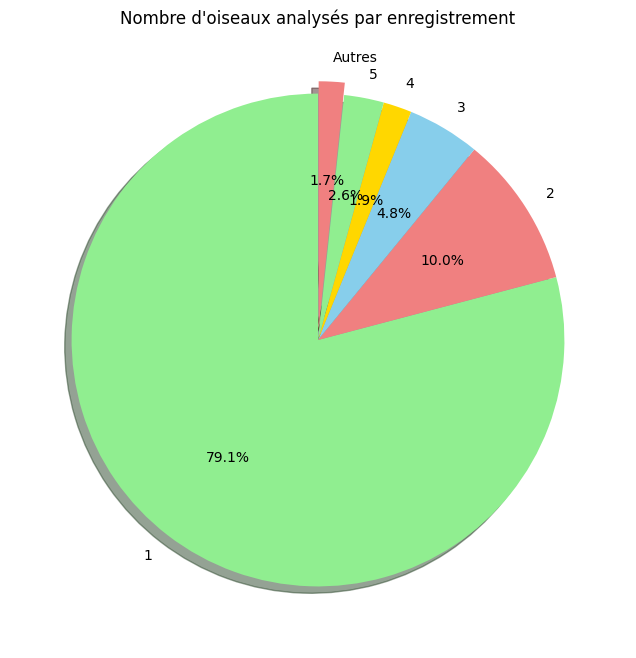

In [38]:
# NOMBRE D'OISEAUX ANALYSES

valeurs_saisies = df.loc[(df['Nombre_oiseaux_analyses'] % 1) == 0, 'Nombre_oiseaux_analyses']  # Utiliser uniquement les valeurs entières
valeurs_saisies = valeurs_saisies.astype(int).to_frame()
g = valeurs_saisies.groupby(['Nombre_oiseaux_analyses']).size()

total = g.sum()
seuil = total * 0.01  
other = g[g < seuil].sum()  # Créer une catégorie "Autre" pour les valeurs inférieures au seuil

# Regrouper les valeurs sous "Autres"
g = g[g >= seuil]
g['Autres'] = other

plt.figure(figsize=(8, 8))  
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue', 'gold'], 
        shadow=True, startangle=90, explode=[0.05 if i == 'Autres' else 0 for i in g.index])

plt.ylabel('')  
plt.title("Nombre d'oiseaux analysés par enregistrement")
plt.show()

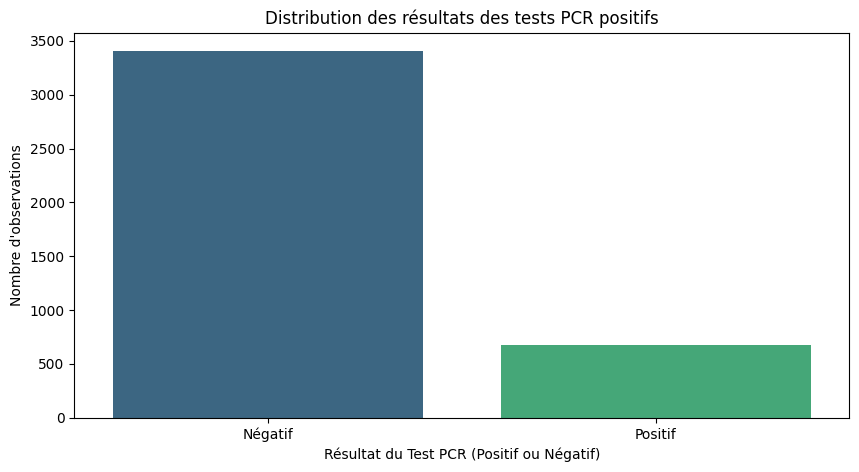

In [39]:
# DISTRBUTION DES RESULTATS DES ANALYSES SELON LA POSITIVITE DES TESTS

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='Test_PCR_positif', 
    hue='Test_PCR_positif', 
    palette='viridis', 
    legend=False
)

plt.title('Distribution des résultats des tests PCR positifs')
plt.xlabel('Résultat du Test PCR (Positif ou Négatif)')
plt.ylabel('Nombre d\'observations')
plt.xticks([0, 1], ['Négatif', 'Positif'])  # Remplace True/False par Négatif/Positif
plt.show()

## 2. Etude de l'impact du nombre de test sur la positivité des résultats

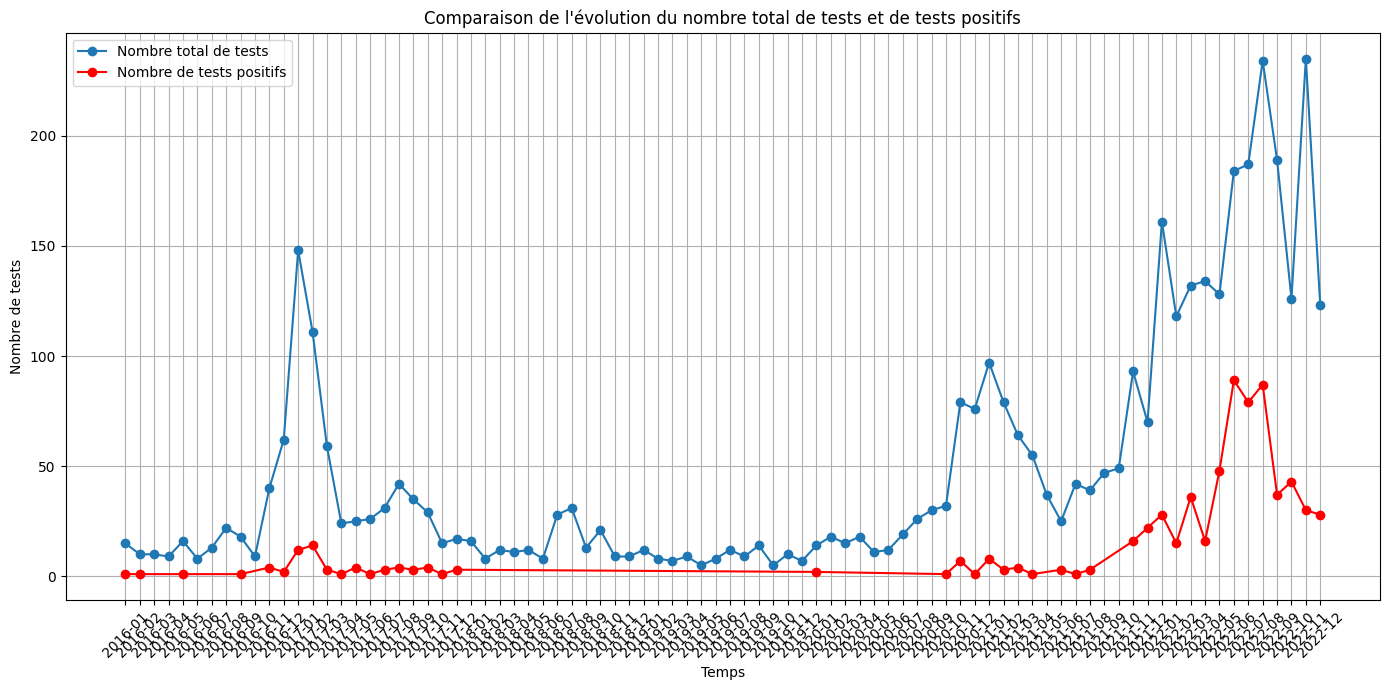

In [40]:
# CORRELATION ENTRE LA FREQUENCE DES TESTS EFFECTUES ET DE LA FREQUENCE DES TESTS POSITIFS SUR LES OISEAUX 

df['A/M_observation'] = df['Date_observation'].dt.strftime('%Y-%m')

# Groupement par mois
total_tests_per_month = df.groupby('A/M_observation').size()
positive_tests_per_month = df[df['Test_PCR_positif']].groupby('A/M_observation').size()

# Création du graphique comparatif
plt.figure(figsize=(14, 7))
plt.plot(total_tests_per_month.index, total_tests_per_month.values, label='Nombre total de tests', marker='o')
plt.plot(positive_tests_per_month.index, positive_tests_per_month.values, label='Nombre de tests positifs', marker='o', color='red')
plt.title('Comparaison de l\'évolution du nombre total de tests et de tests positifs')
plt.xlabel('Temps')
plt.ylabel('Nombre de tests')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

-> On observe donc que les périodes où le nombre de tests positifs augmente sont souvent précédées ou accompagnées d’une hausse simultanée  du nombre total de tests effectués. Cela suggère que les autorités de surveillance peuvent intensifier les tests en réponse à des signaux d’alerte ou des foyers d’infection identifiés.

## 3. Répartition temporelle des données

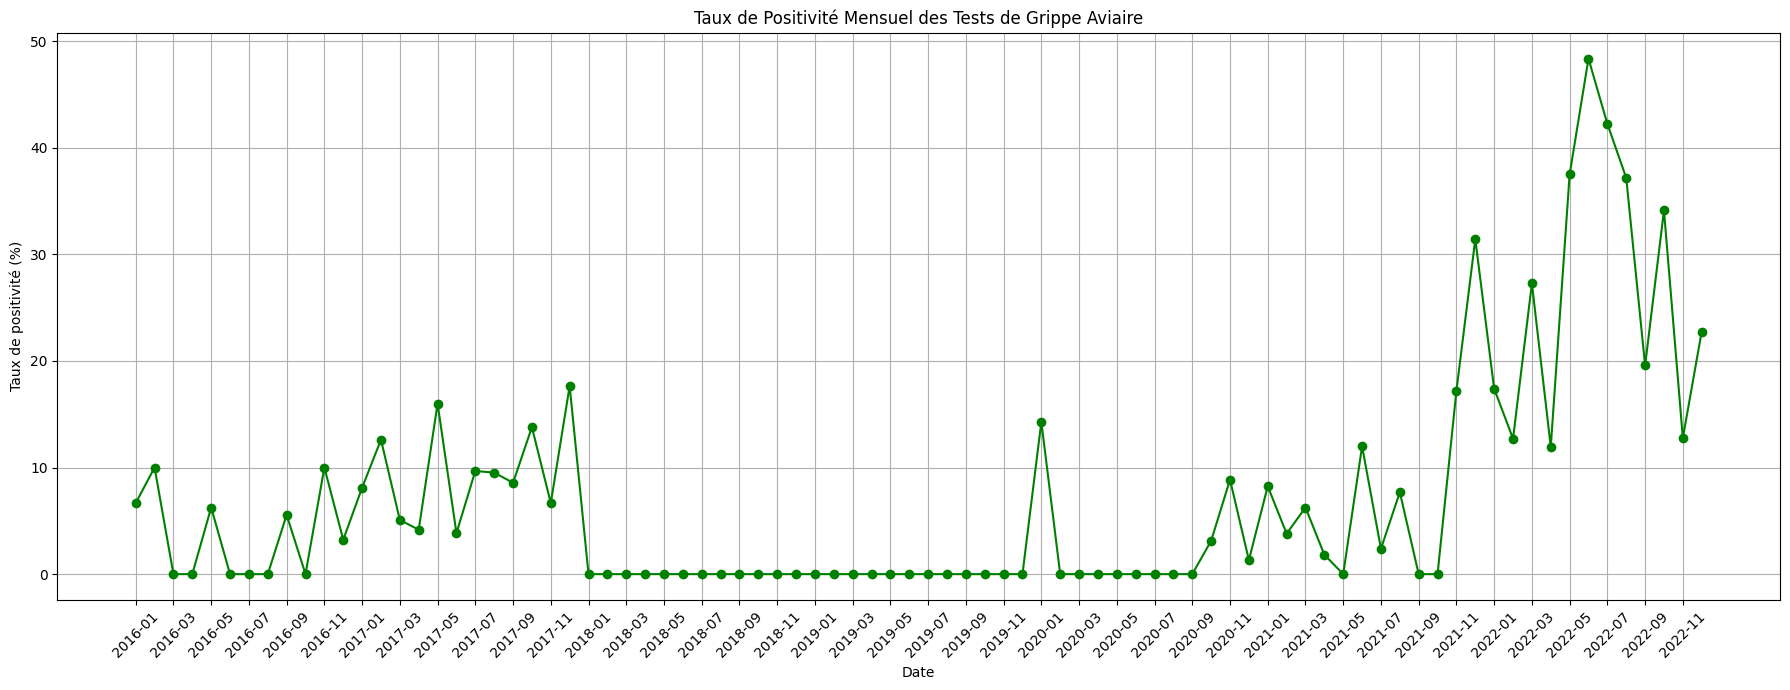

In [41]:
# PROPORTION DE TEST POSITIFS SELON LE TEMPS

# Calcul du taux de positivité par mois
total_tests_per_month = df.groupby('A/M_observation').size()
positive_tests_per_month = df[df['Test_PCR_positif']].groupby('A/M_observation').size()
positivity_rate_per_month = (positive_tests_per_month / total_tests_per_month * 100).fillna(0)

# Création du graphique avec élargissement de l'espace sur l'axe des abscisses
plt.figure(figsize=(18, 7))  # Augmentation de la largeur de la figure
plt.plot(positivity_rate_per_month.index, positivity_rate_per_month.values, marker='o', linestyle='-', color='green')
plt.title('Taux de Positivité Mensuel des Tests de Grippe Aviaire')
plt.xlabel('Date')
plt.ylabel('Taux de positivité (%)')
plt.grid(True)

# Réglage des étiquettes de l'axe x pour afficher une étiquette sur deux, par exemple
plt.xticks(positivity_rate_per_month.index[::2], rotation=45)

plt.tight_layout()
plt.show()

-> On retrouve ici clairement les différentes vagues de grippe aviaire connu par la France ces dernières années. 
Particulièrement, sur les 5 dernières années, un épisode majeur de grippe aviaire a été déclaré en novembre 2020, puis s'est prolongé durant la première partie de l'année 2021. À partir de fin la fin de cette même année, une nouvelle vague de grippe aviaire a touché le pays. En décembre 2021, des mesures de confinement et de vaccination ont notamment été renforcées dans les élevages. L’année 2022 a quant à elle été marquée par des alertes régulières : des foyers ont été rapportés tout au long de l'année.

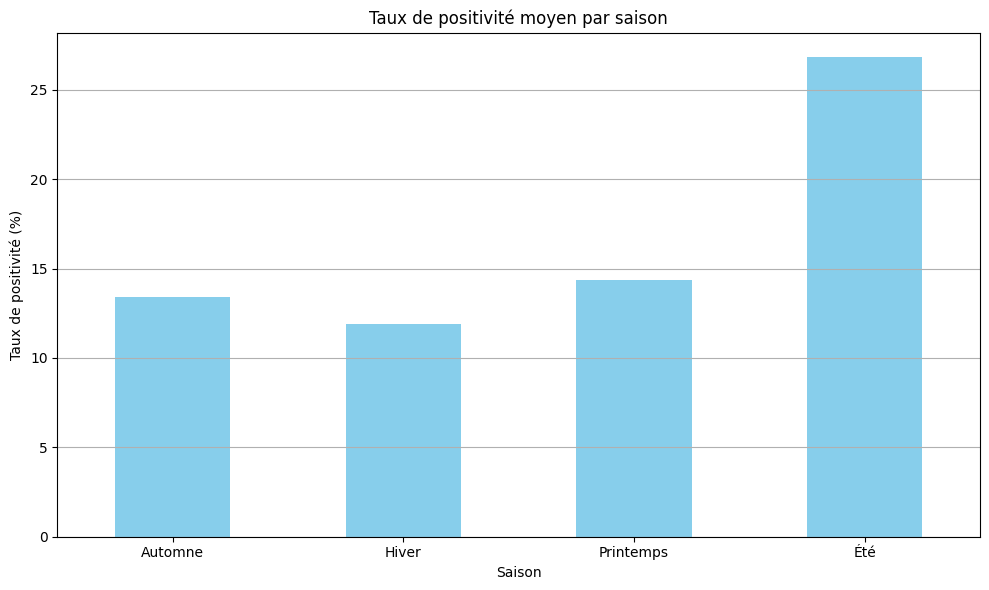

In [42]:
# TAUX DE POSITIVITE MOYEN PAR SAISON

# Ajout d'une colonne pour identifier la saison en fonction de la date d'observation
df['Saison'] = df['Date_observation'].dt.month % 12 // 3 + 1
df['Saison'] = df['Saison'].replace({1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'})

# Calcul du taux de positivité moyen par saison
total_tests_per_season = df.groupby('Saison').size()
positive_tests_per_season = df[df['Test_PCR_positif']].groupby('Saison').size()
positivity_rate_per_season = (positive_tests_per_season / total_tests_per_season * 100).fillna(0)

# Création du graphique
plt.figure(figsize=(10, 6))
positivity_rate_per_season.plot(kind='bar', color='skyblue')
plt.title('Taux de positivité moyen par saison')
plt.xlabel('Saison')
plt.ylabel('Taux de positivité (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

-> Le graphique révèle que l'été a un taux de positivité significativement plus élevé que les autres, ce qui indique une augmentation des cas positifs pendant cette période. Cela pourrait être lié à des facteurs environnementaux (comme des températures plus élevées favorisant la propagation du virus) favorables à la transmission.

## 4. Etude de l'impact des ZRP

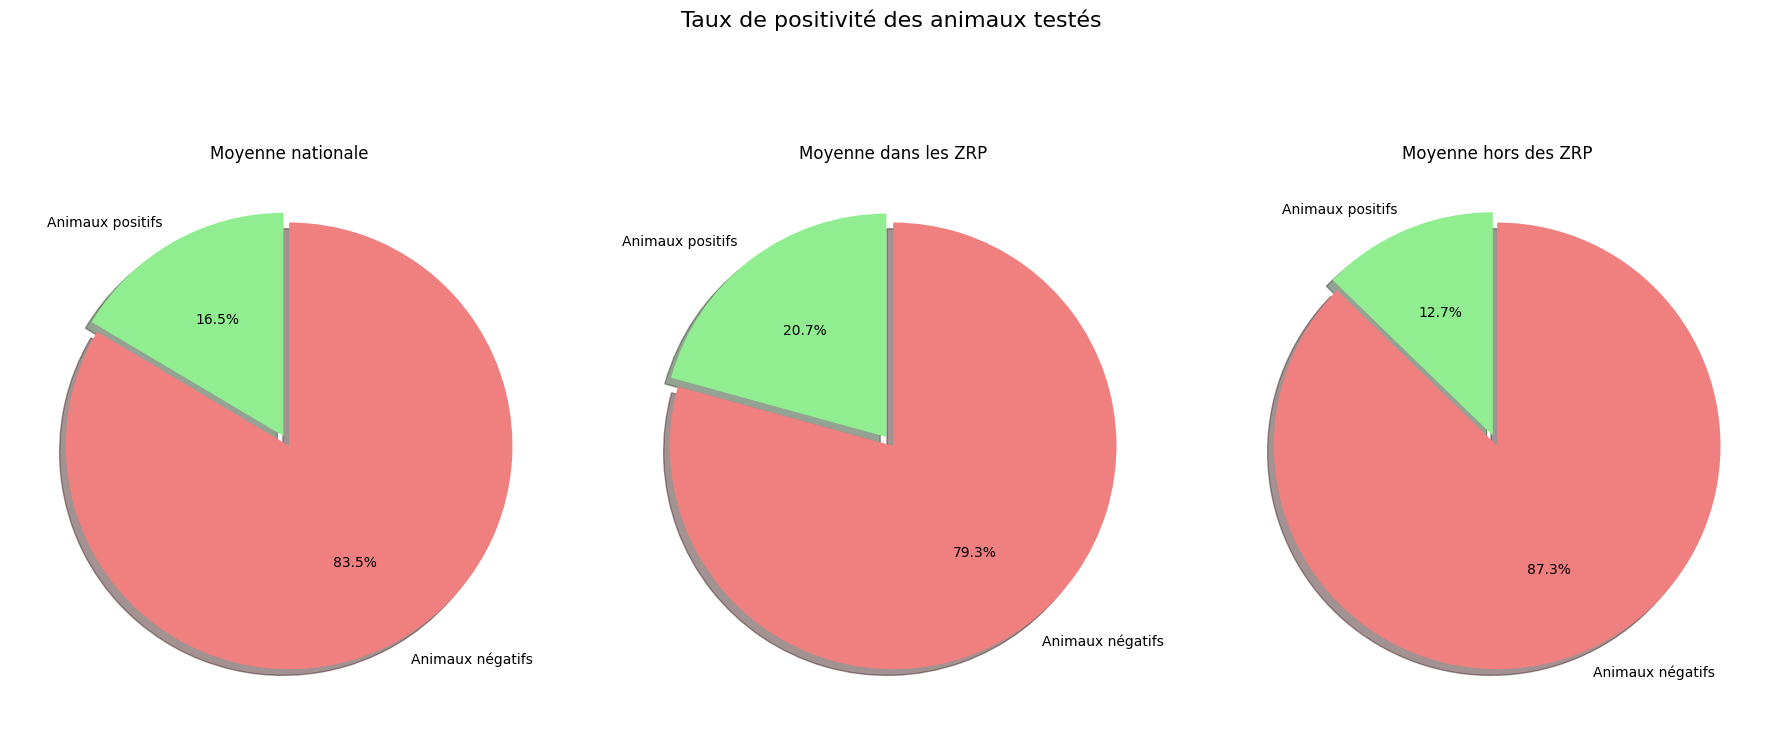

In [43]:
# INFLUENCE DES ZRP

Répartition = ['Animaux positifs', 'Animaux négatifs']

# Moyenne nationale
D1 = [df['Test_PCR_positif'].mean(), 1 - df['Test_PCR_positif'].mean()]

# Moyenne dans les ZRP et hors ZRP
Influence_ZRP = df.pivot_table(values='Test_PCR_positif', index='ZRP')
D2 = [Influence_ZRP.loc[True, 'Test_PCR_positif'], 1 - Influence_ZRP.loc[True, 'Test_PCR_positif']]
D3 = [Influence_ZRP.loc[False, 'Test_PCR_positif'], 1 - Influence_ZRP.loc[False, 'Test_PCR_positif']]

# Création des camemberts
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Taux de positivité des animaux testés', fontsize=16)

# Camembert pour la moyenne nationale
axs[0].pie(D1, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[0].set_title('Moyenne nationale')

# Camembert pour la moyenne dans les ZRP
axs[1].pie(D2, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[1].set_title('Moyenne dans les ZRP')

# Camembert pour la moyenne hors des ZRP
axs[2].pie(D3, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[2].set_title('Moyenne hors des ZRP')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajuster l'espace en haut pour le titre
plt.show()

-> Comme attendu, le statut de ZRP associé à une certaine zone d'analyse conduit à l'obtention d'un taux de positivité suppérieur : la virulence de la maladie y est accrue. Toutefois, on remarque que cette hausse de la positivité dans les ZRP reste modérée si l'on considère de manière aveugle l'ensemble des évènements rapportés.

On peut cependant ce demander si ce résultat peut être amené à évoluer dans une situation d'épidémie nationale :

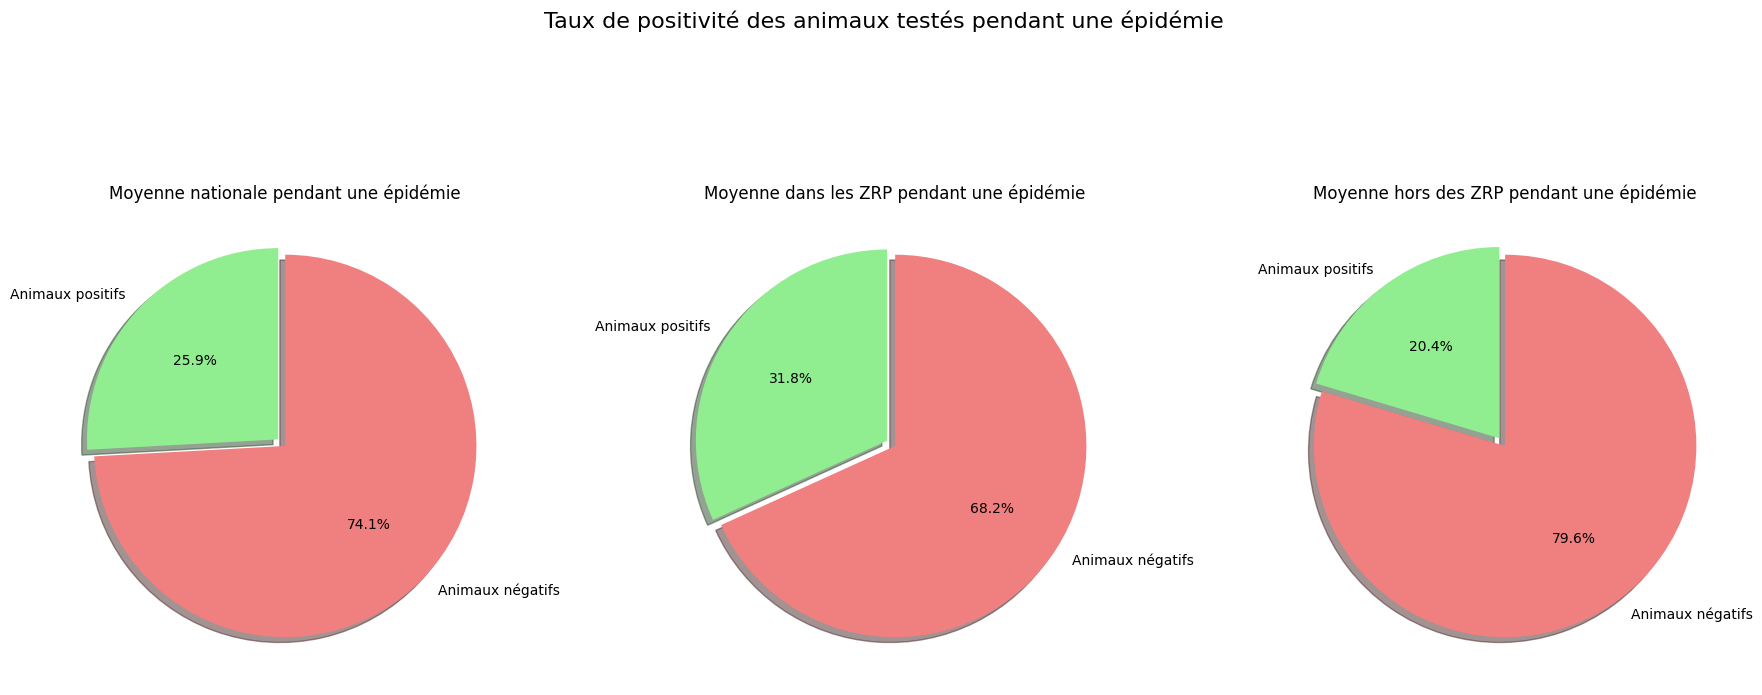

In [44]:
# Seuil de taux de positivité pour considérer une période comme une "épidémie" = 10% 
epidemic_threshold = 10

# Calcul du taux de positivité mensuel :
total_tests_per_month = df.groupby('A/M_observation').size()
positive_tests_per_month = df[df['Test_PCR_positif']].groupby('A/M_observation').size()
positivity_rate_per_month = (positive_tests_per_month / total_tests_per_month * 100).fillna(0)

# Déterminer les mois de pandémie :
epidemic_months = positivity_rate_per_month[positivity_rate_per_month > epidemic_threshold].index

# Etablissement des graphiques :
df_epidemic = df[df['A/M_observation'].isin(epidemic_months)]

D1_epidemic = [df_epidemic['Test_PCR_positif'].mean(), 1 - df_epidemic['Test_PCR_positif'].mean()]

Influence_ZRP_epidemic = df_epidemic.pivot_table(values='Test_PCR_positif', index='ZRP')
D2_epidemic = [Influence_ZRP_epidemic.loc[True, 'Test_PCR_positif'], 1 - Influence_ZRP_epidemic.loc[True, 'Test_PCR_positif']]
D3_epidemic = [Influence_ZRP_epidemic.loc[False, 'Test_PCR_positif'], 1 - Influence_ZRP_epidemic.loc[False, 'Test_PCR_positif']]


fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Taux de positivité des animaux testés pendant une épidémie',fontsize=16)

axs[0].pie(D1_epidemic, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[0].set_title('Moyenne nationale pendant une épidémie')

axs[1].pie(D2_epidemic, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[1].set_title('Moyenne dans les ZRP pendant une épidémie')

axs[2].pie(D3_epidemic, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[2].set_title('Moyenne hors des ZRP pendant une épidémie')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

-> Les résultats obtenus diffèrent significativement des précédents. Comme le taux de positivité dans les ZRP est significativement plus élevé que dans les zones hors ZRP, cela valide leur rôle comme zones à risque accru pendant une épidémie et justifie leur mise en place.

## 5. Mise en valeur des espèces les plus touchées par les épidémies

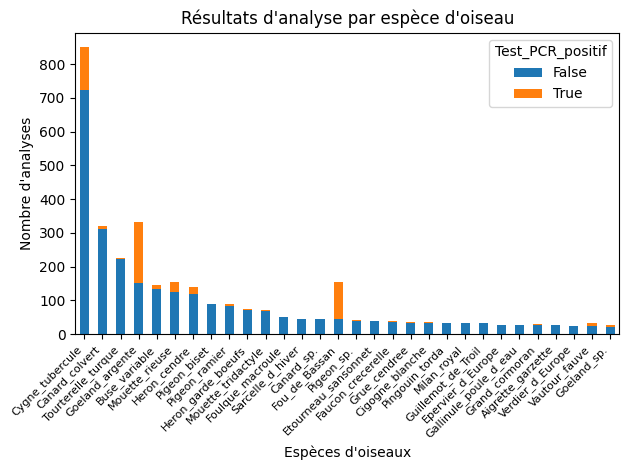

In [45]:
# AGREGATION DE DONNEES : RESULTAT D'ANALYSE PAR ESPECE D'OISEAU

bird_analysis_counts = df.groupby(['Espece_nom_fr', 'Test_PCR_positif']).size().unstack(fill_value=0)
bird_analysis_counts['Somme'] = bird_analysis_counts[False] + bird_analysis_counts[True]
bird_analysis_counts = bird_analysis_counts.sort_values(by='Somme',ascending=False).nlargest(30,False)
bird_analysis_counts = bird_analysis_counts.drop(columns='Somme')
bird_analysis_counts.plot(kind='bar', stacked=True)
plt.title("Résultats d'analyse par espèce d'oiseau")
plt.ylabel("Nombre d'analyses")
plt.xlabel("Espèces d'oiseaux")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [46]:
bird_analysis_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Cygne_tubercule to Goeland_sp.
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   False   30 non-null     int64
 1   True    30 non-null     int64
dtypes: int64(2)
memory usage: 1.8+ KB


# REPARTITION GEOGRAPHIQUE DES EPIDEMIES

## 1. Préparation des données géographiques 

In [56]:
df_bis = pd.read_csv('dataverse_files/Correspondance-code-insee-code-postal.csv',sep=';',encoding='latin-1')
df_bis['Département'] = df_bis['Département'].str[2:-2] # Amélioration de la lisibilité du contenu de la colonne 'Département'
df_bis['Région'] = df_bis['Région'].str[2:-2] # Amélioration de la lisibilité du contenu de la colonne 'Région'
df_bis.head()

,Code INSEE,Code Postal,Commune,Département,Région
0,64012,64130,AINHARP,PYRENEES-ATLANTIQUES,AQUITAINE
1,2A108,20126,EVISA,CORSE-DU-SUD,CORSE
2,28232,28240,MANOU,EURE-ET-LOIR,CENTRE
3,62761,62128,SAINT-MARTIN-SUR-COJEUL,PAS-DE-CALAIS,NORD-PAS-DE-CALAIS
4,56219,56460,SAINT-GUYOMARD,MORBIHAN,BRETAGNE


In [57]:
df_merge = df.merge(df_bis[['Code INSEE','Code Postal','Département']].rename(columns={'Code Postal': 'Code_postal','Département': 'Departement'}),left_on="Commune_ID", right_on="Code INSEE").drop('Code INSEE', axis=1)

## 2. Comparaison des zones affectées par les épidémies

In [58]:
# REPARTITION GEOGRAPHIQUE DES TESTS REALISES SUR LES OISEAUX
(df_merge.groupby('Departement').size()*100/len(df_merge)).sort_values(ascending = False)

Departement
LOIRE-ATLANTIQUE    6.231600
FINISTERE           4.465162
SOMME               4.293425
NORD                3.925417
MANCHE              3.900883
                      ...   
CORREZE             0.147203
TARN-ET-GARONNE     0.147203
HAUTE-LOIRE         0.098135
HAUTES-ALPES        0.098135
LOT                 0.073602
Length: 95, dtype: float64

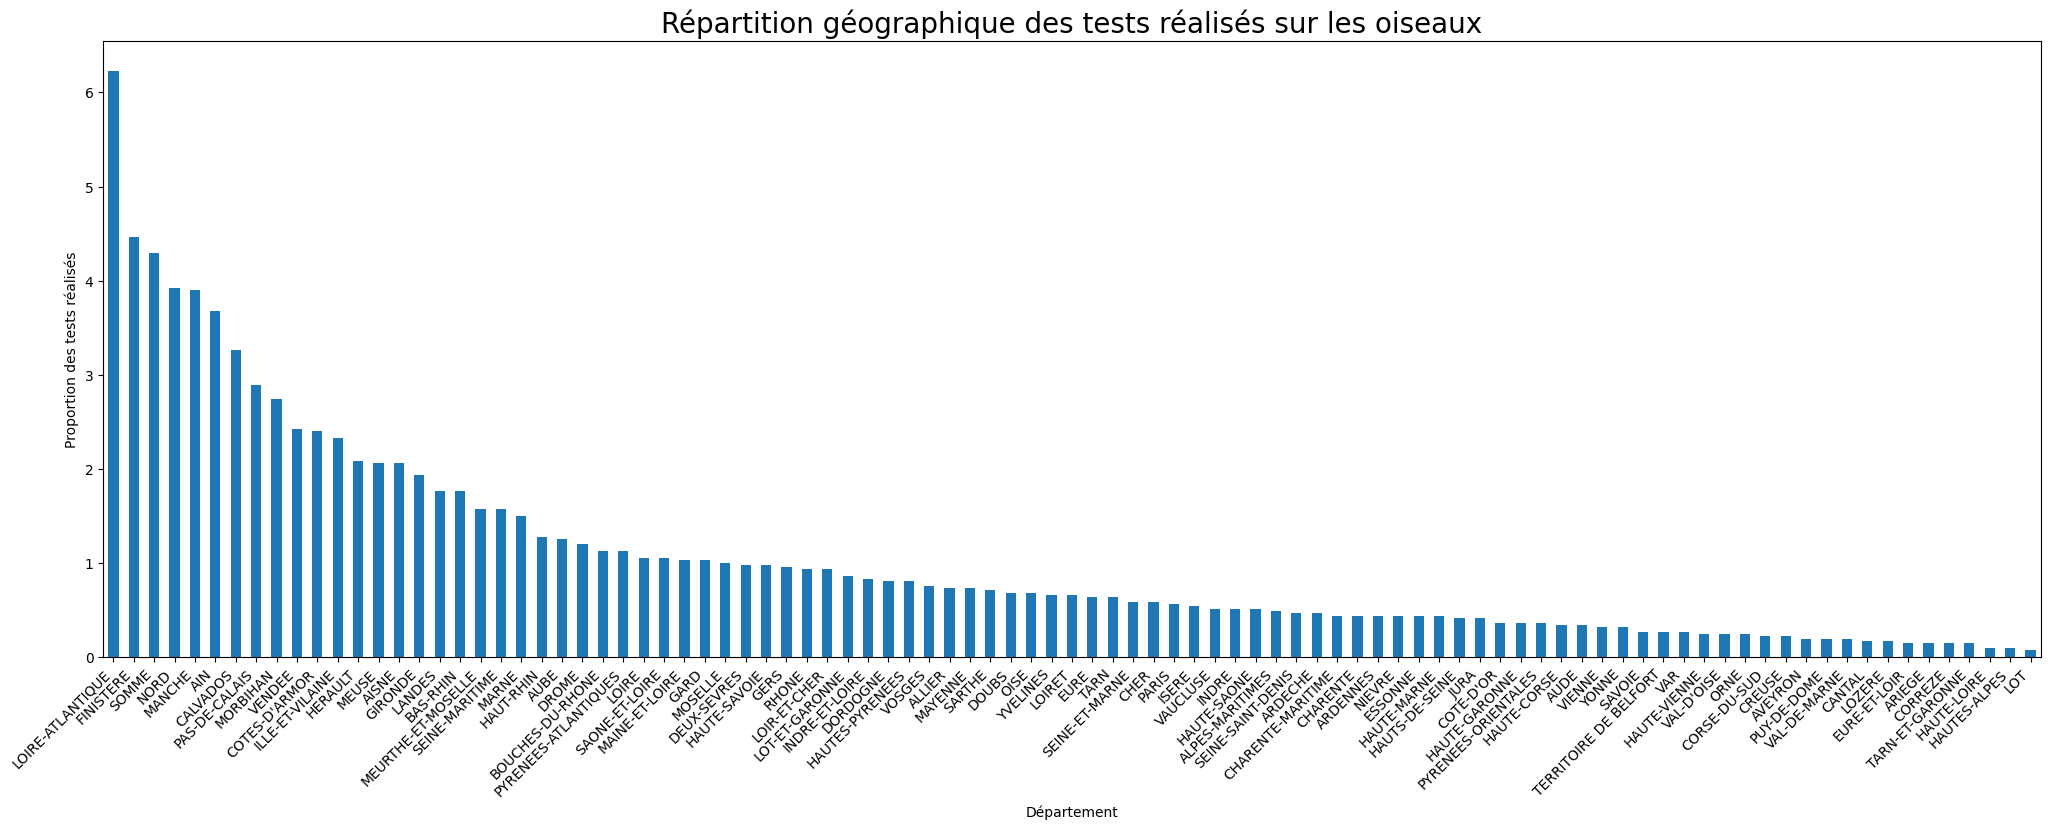

In [59]:
(df_merge.groupby('Departement').size()*100/len(df_merge)).sort_values(ascending = False).plot(kind='bar', stacked=True, figsize=(25, 8))
plt.title("Répartition géographique des tests réalisés sur les oiseaux", fontsize=20)
plt.ylabel("Proportion des tests réalisés")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [60]:
# REPARTITION GEOGRAPHIQUE DES TESTS POSITIFS
g = df_merge.groupby('Departement')['Test_PCR_positif'].mean().sort_values(ascending = False)
g

Departement
AVEYRON              0.500000
CHARENTE-MARITIME    0.444444
CALVADOS             0.428571
SEINE-MARITIME       0.421875
SOMME                0.405714
                       ...   
TARN-ET-GARONNE      0.000000
VAR                  0.000000
VIENNE               0.000000
YONNE                0.000000
YVELINES             0.000000
Name: Test_PCR_positif, Length: 95, dtype: float64

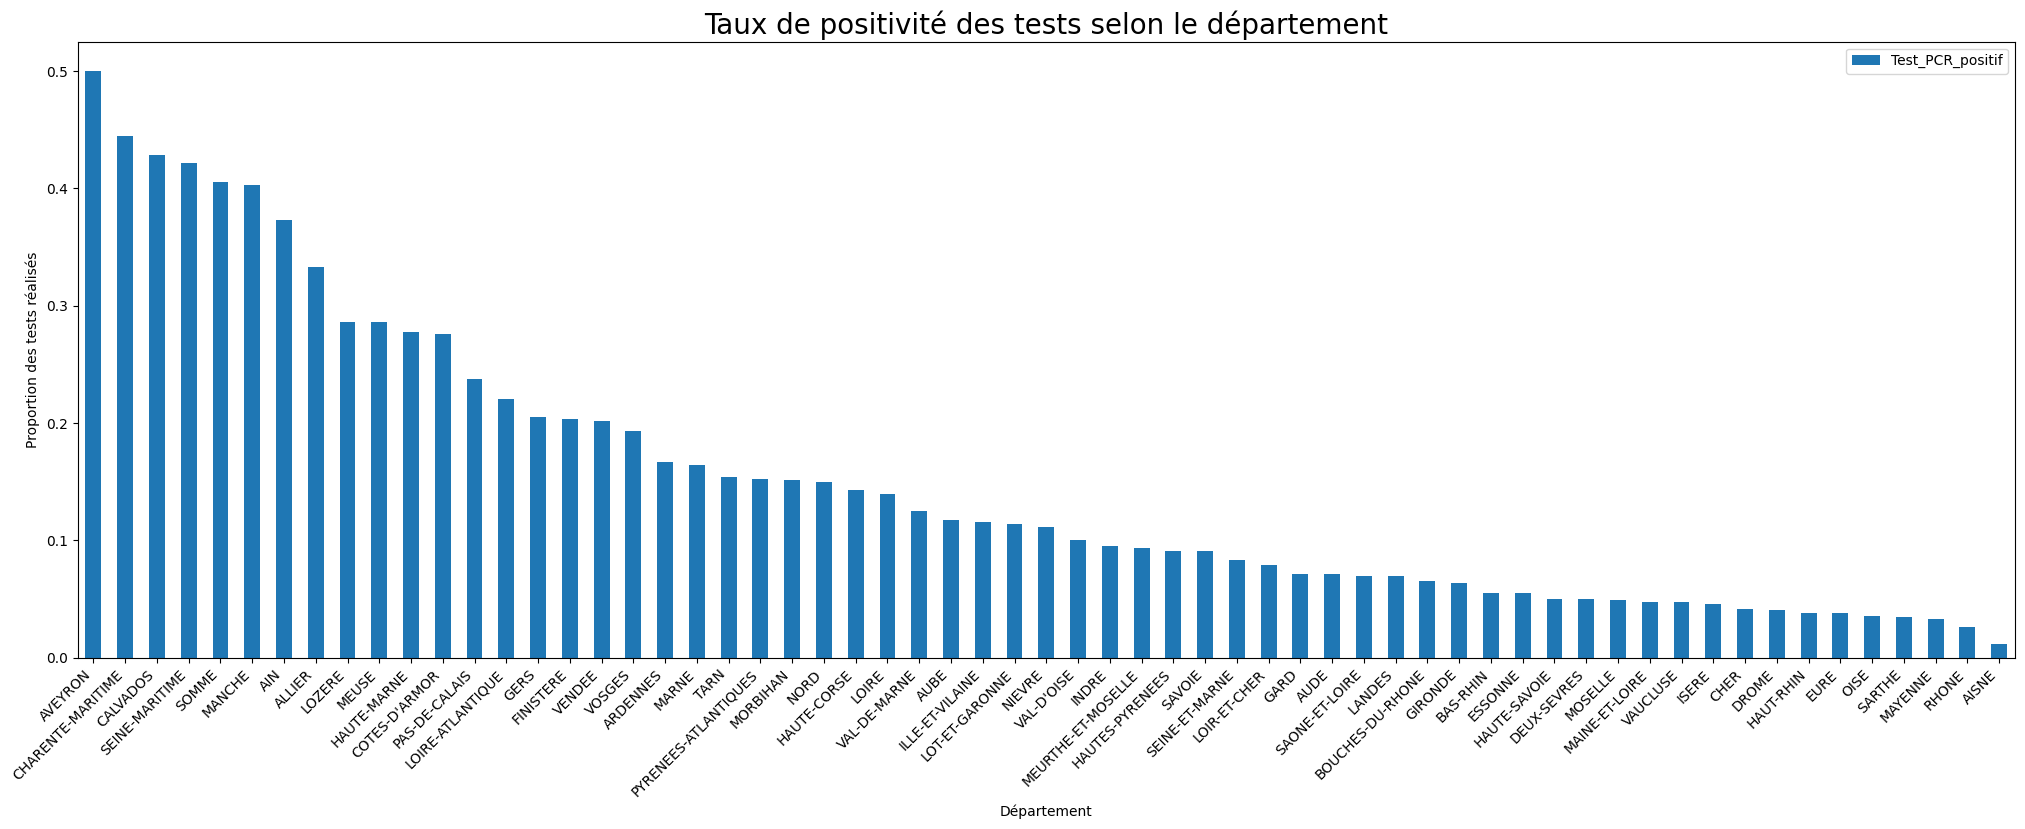

In [61]:
g_df = g.to_frame()
indices_a_supprimer = g_df[g_df['Test_PCR_positif'] == 0].index
g_df_sans_0 = g_df.drop(indices_a_supprimer)

g_df_sans_0.plot(kind='bar', stacked=True, figsize=(25, 8))
plt.title("Taux de positivité des tests selon le département", fontsize=20)
plt.ylabel("Proportion des tests réalisés")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

## 3. Identification des départements où la surveillance hors ZRP pourrait être renforcée

### 3.1 Identification des départements hors ZRP ayant un fort taux de positivité

<Figure size 1400x700 with 0 Axes>

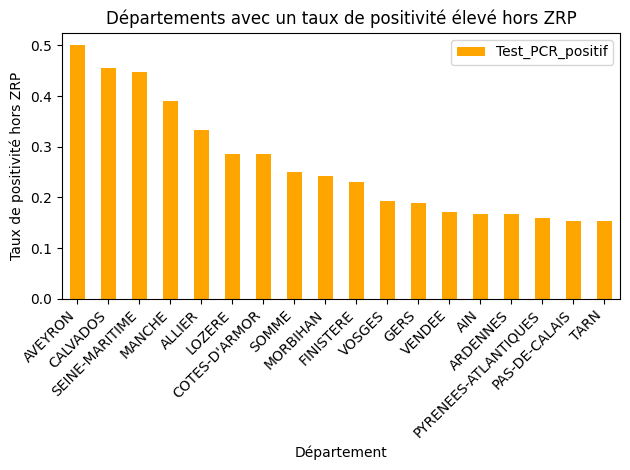

In [62]:
# IDENTIFICATION DES DEPARTEMENTS AVEC UN TAUX DE POSITIVITE ELEVE HORS ZRP. 

g_bis = df_merge[df_merge['ZRP'] == False].groupby(['Departement'])['Test_PCR_positif'].mean()
ter = g_bis.to_frame()

moyenne_nationale_taux_positivite = float(g_df_sans_0.mean().iloc[0])

departements_hors_zrp_elev = ter[ter['Test_PCR_positif'] > moyenne_nationale_taux_positivite].sort_values(by='Test_PCR_positif',ascending=False)

plt.figure(figsize=(14, 7))
departements_hors_zrp_elev.plot(kind='bar', color='orange')
plt.title("Départements avec un taux de positivité élevé hors ZRP")
plt.ylabel("Taux de positivité hors ZRP")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

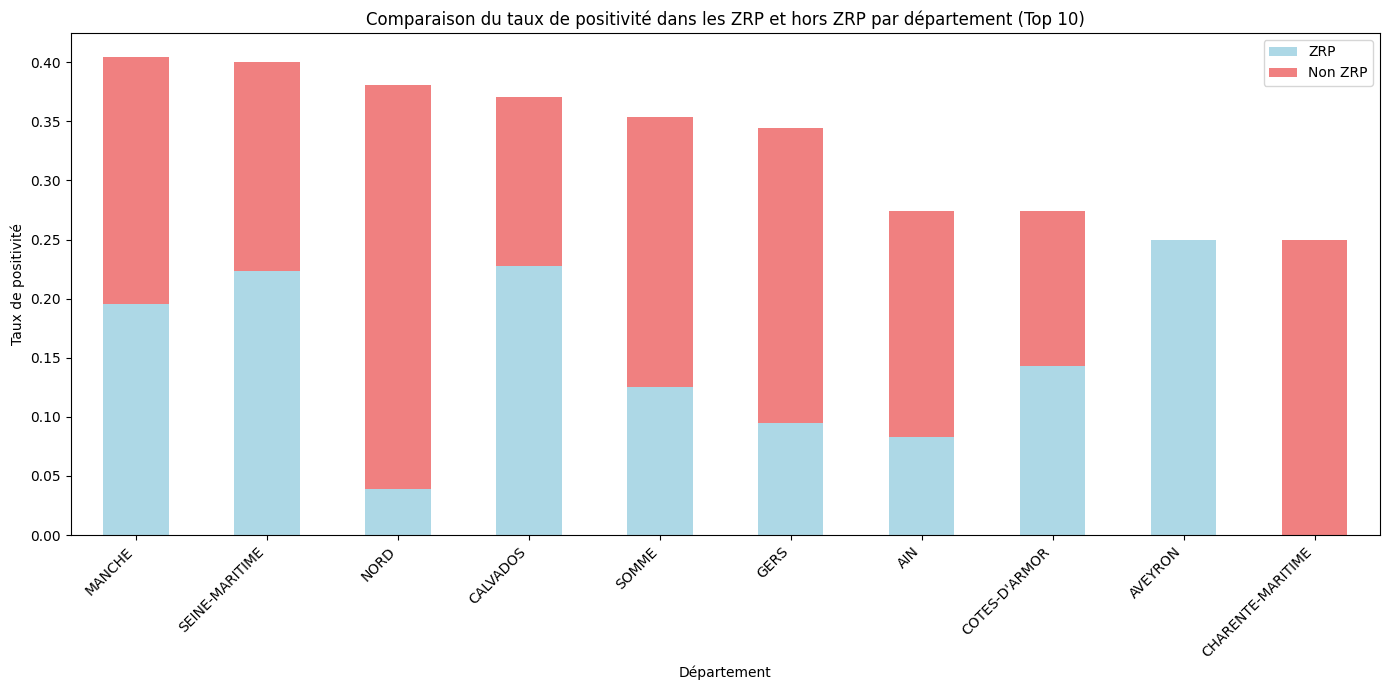

In [63]:
g_ter = df_merge.groupby(['Departement','ZRP'])['Test_PCR_positif'].mean()

df_grouped = g_ter.unstack().fillna(0)  # On remplit les valeurs manquantes avec 0 
df_grouped['Somme'] = (df_grouped[False] + df_grouped[True])/2
df_grouped[False] = df_grouped[False]/2
df_grouped[True] = df_grouped[True]/2
df_grouped = df_grouped.nlargest(10, 'Somme').drop('Somme', axis=1)
df_grouped.columns = ['ZRP', 'hors ZRP']

df_grouped.plot(kind="bar", figsize=(14, 7), stacked=True, color=['lightblue', 'lightcoral'])
plt.title("Comparaison du taux de positivité dans les ZRP et hors ZRP par département (Top 10)")
plt.ylabel("Taux de positivité")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right')
plt.legend(['ZRP', 'Non ZRP'])
plt.tight_layout()
plt.show()

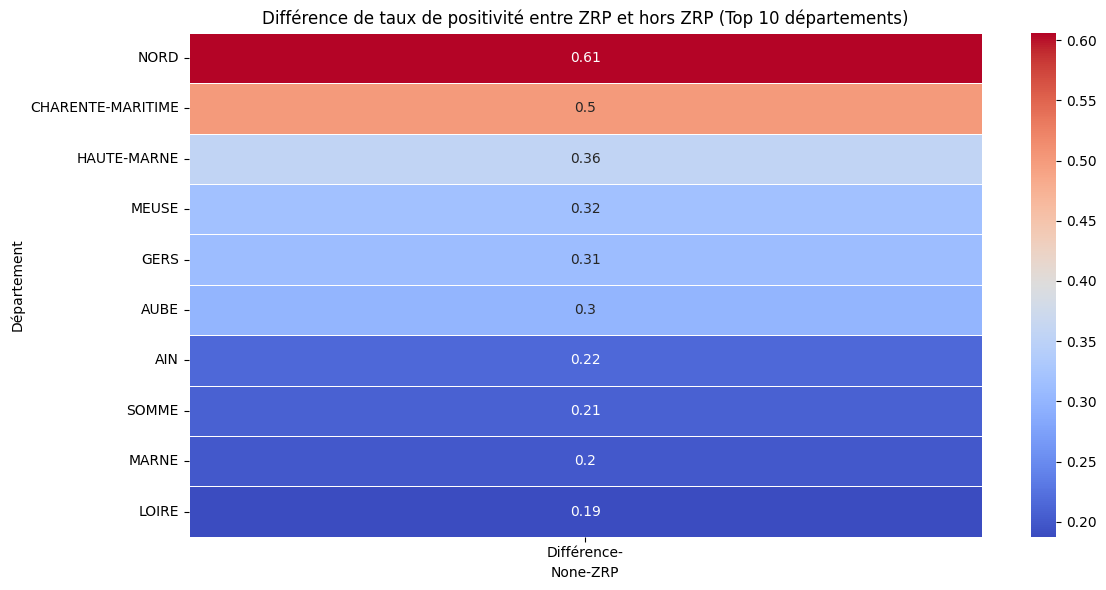

In [64]:
g_ter = df_merge.groupby(['Departement','ZRP'])['Test_PCR_positif'].mean()

ter = g_ter.to_frame()
ter = ter.unstack('ZRP')
ter['Différence'] = ter['Test_PCR_positif'][True] - ter['Test_PCR_positif'][False]
ter = ter.dropna().sort_values(by='Différence',ascending=False).nlargest(10, 'Différence')
ter.head()

plt.figure(figsize=(12, 6))
sns.heatmap(ter[['Différence']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Différence de taux de positivité entre ZRP et hors ZRP (Top 10 départements)")
plt.ylabel("Département")
plt.tight_layout()
plt.show()

-> Les départements tels que le Nord et la Charente-Maritime présentent un écart significatif entre les ZRP et les zones non ZRP, avec des taux de positivité bien plus élevés dans les ZRP. Ces résultats justifient l’existence et l’efficacité des ZRP, car elles concentrent les efforts de surveillance là où l’incidence de la maladie est la plus forte. Cela renforce l’idée que ces zones contribuent à la détection proactive et à la gestion des épidémies. Ces zones pourraient nécessiter une expansion des zones de surveillance pour mieux contrôler la propagation.

###  3.2 Croisement des données de densité des tests et du taux de postitivité 

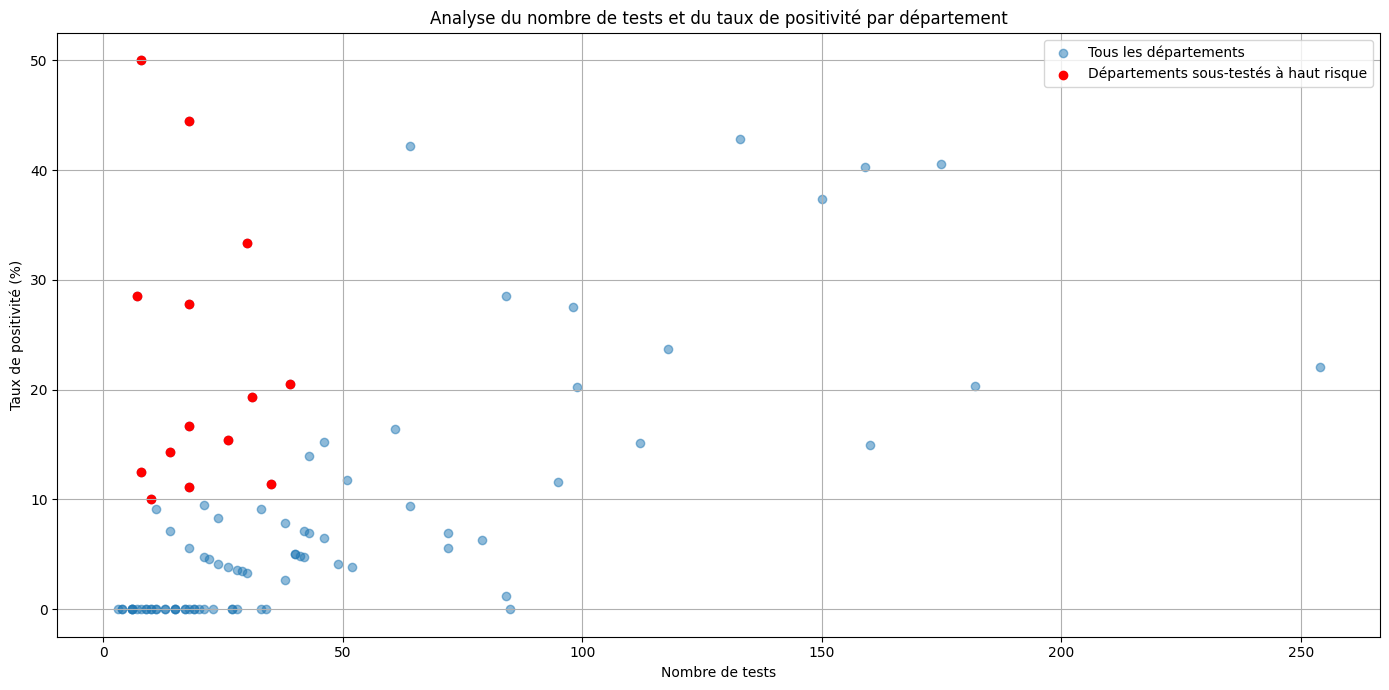

,Nombre de tests,Taux de positivité (%)
Departement,,
ALLIER,30,33.333333
ARDENNES,18,16.666667
AVEYRON,8,50.000000
CHARENTE-MARITIME,18,44.444444
GERS,39,20.512821
HAUTE-CORSE,14,14.285714
HAUTE-MARNE,18,27.777778
LOT-ET-GARONNE,35,11.428571
LOZERE,7,28.571429


In [65]:
# ON CROISE LA DENSITE DES TESTS REALISES ET LE TAUX DE POSITIVITE

# Calcul du nombre total de tests et du taux de positivité par département
tests_par_departement = df_merge.groupby('Departement').size()
positivite_par_departement = df_merge.groupby('Departement')['Test_PCR_positif'].mean()

df_analysis = pd.DataFrame({
    'Nombre de tests': tests_par_departement,
    'Taux de positivité (%)': positivite_par_departement * 100
})

# Identification des départements sous-testés mais à haut risque :
sous_testes = df_analysis[(df_analysis['Taux de positivité (%)'] > df_analysis['Taux de positivité (%)'].mean()) &
                          (df_analysis['Nombre de tests'] < df_analysis['Nombre de tests'].mean())]

plt.figure(figsize=(14, 7))
plt.scatter(df_analysis['Nombre de tests'], df_analysis['Taux de positivité (%)'], alpha=0.5, label='Tous les départements')
plt.scatter(sous_testes['Nombre de tests'], sous_testes['Taux de positivité (%)'], color='red', label='Départements sous-testés à haut risque')
plt.title("Analyse du nombre de tests et du taux de positivité par département")
plt.xlabel("Nombre de tests")
plt.ylabel("Taux de positivité (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

sous_testes

-> Les points rouges indiquent des départements où le taux de positivité est supérieur à la moyenne, mais où le nombre de tests réalisés est inférieur à la moyenne. Cela révèle des zones potentiellement à risque qui ne reçoivent pas suffisamment d’attention en termes de surveillance. On peut penser que ces départements nécessitent une intensification des efforts de dépistage pour mieux comprendre et contrôler la propagation de l’épidémie. 

# REPRESENTATIONS CARTOGRAPHIQUES

In [66]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Transformer


**Avertissement :** les affichages mettent un certain temps (éventuellement de l'ordre de 30s) à apparaître après l'execution des cellules de code

## 1. Visualisation cartographiqe des tests (scatter plot géographique)

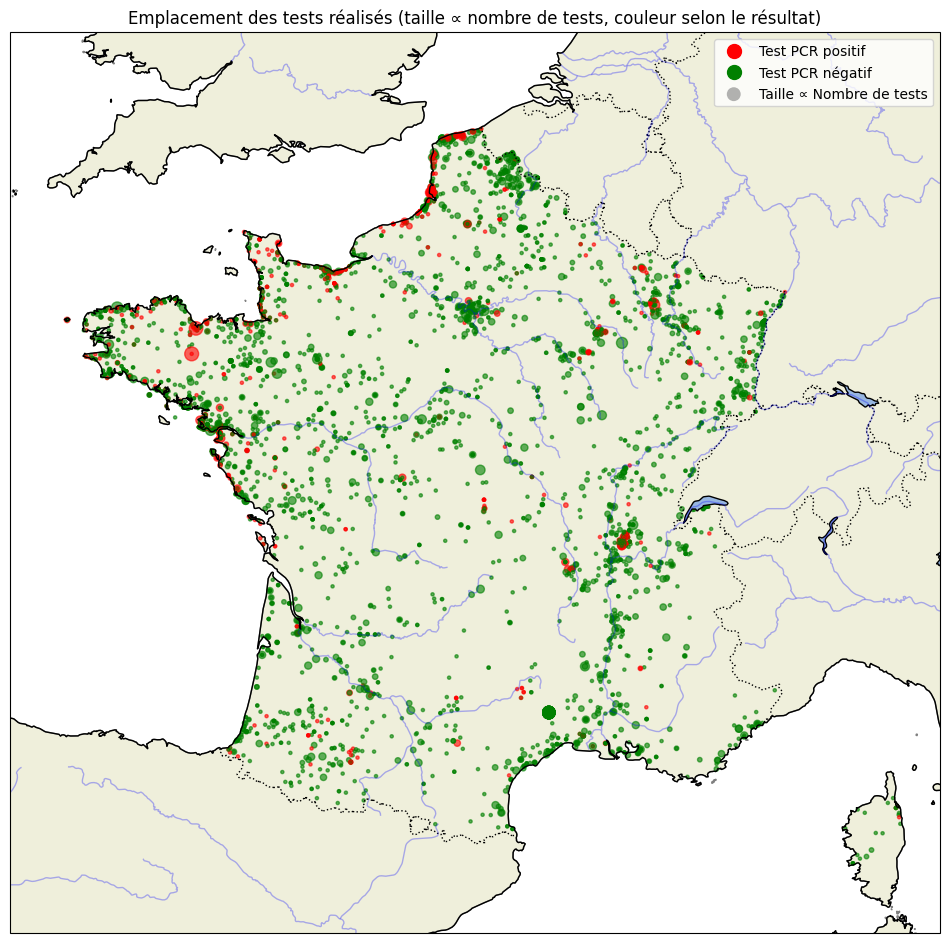

In [67]:
# EMPLACEMENT DES TESTS REALISES (TAILLE SELON LE NOMBRE DE TESTS, COULEURS SELON LE RESULTAT)

# Initialisation du transformateur entre Lambert-93 (EPSG:2154) et WGS84 (EPSG:4326)
transformer = Transformer.from_crs('epsg:2154', 'epsg:4326', always_xy=True)

# Filtrer les données pour s'assurer qu'elles ont la même longueur
df_filtered = df.dropna(subset=['X_localisation', 'Y_localisation', 'Nombre_oiseaux_analyses', 'Test_PCR_positif'])
X = df_filtered['X_localisation']
Y = df_filtered['Y_localisation']
num_tests = df_filtered['Nombre_oiseaux_analyses']
positifs = df_filtered['Test_PCR_positif']

# Conversion des coordonnées projetées en longitudes et latitudes
longitudes, latitudes = transformer.transform(X.values, Y.values)

# Normalisation des tailles des points
sizes = num_tests / num_tests.max() * 100  # Normalisation des tailles
colors = ['red' if p else 'green' for p in df_filtered['Test_PCR_positif']]  # Couleur rouge pour positif, vert sinon

# Création de la figure et de l'axe avec la projection correcte
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=3.0, central_latitude=46.5,
                                                               standard_parallels=(44.0, 49.0)))

# Définir l'étendue de la carte (France)
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.LAND, edgecolor='gray')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.3)

# Tracer les points avec des tailles et des couleurs variables
scatter = ax.scatter(longitudes, latitudes, s=sizes, c=colors, alpha=0.6, transform=ccrs.PlateCarree())

# Légende
import matplotlib.lines as mlines
positif_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='Test PCR positif')
negatif_marker = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=10, label='Test PCR négatif')

size_legend = plt.scatter([], [], s=100, edgecolors='none', color='gray', alpha=0.6, label='Taille ∝ Nombre de tests')

ax.legend(handles=[positif_marker, negatif_marker, size_legend], loc='upper right')

plt.title('Emplacement des tests réalisés (taille ∝ nombre de tests, couleur selon le résultat)')
plt.show()

## 2. Heatmaps de densité pour une analyse spatiale approfondie

### 2.1 Comparaison densité tests positifs et négatifs

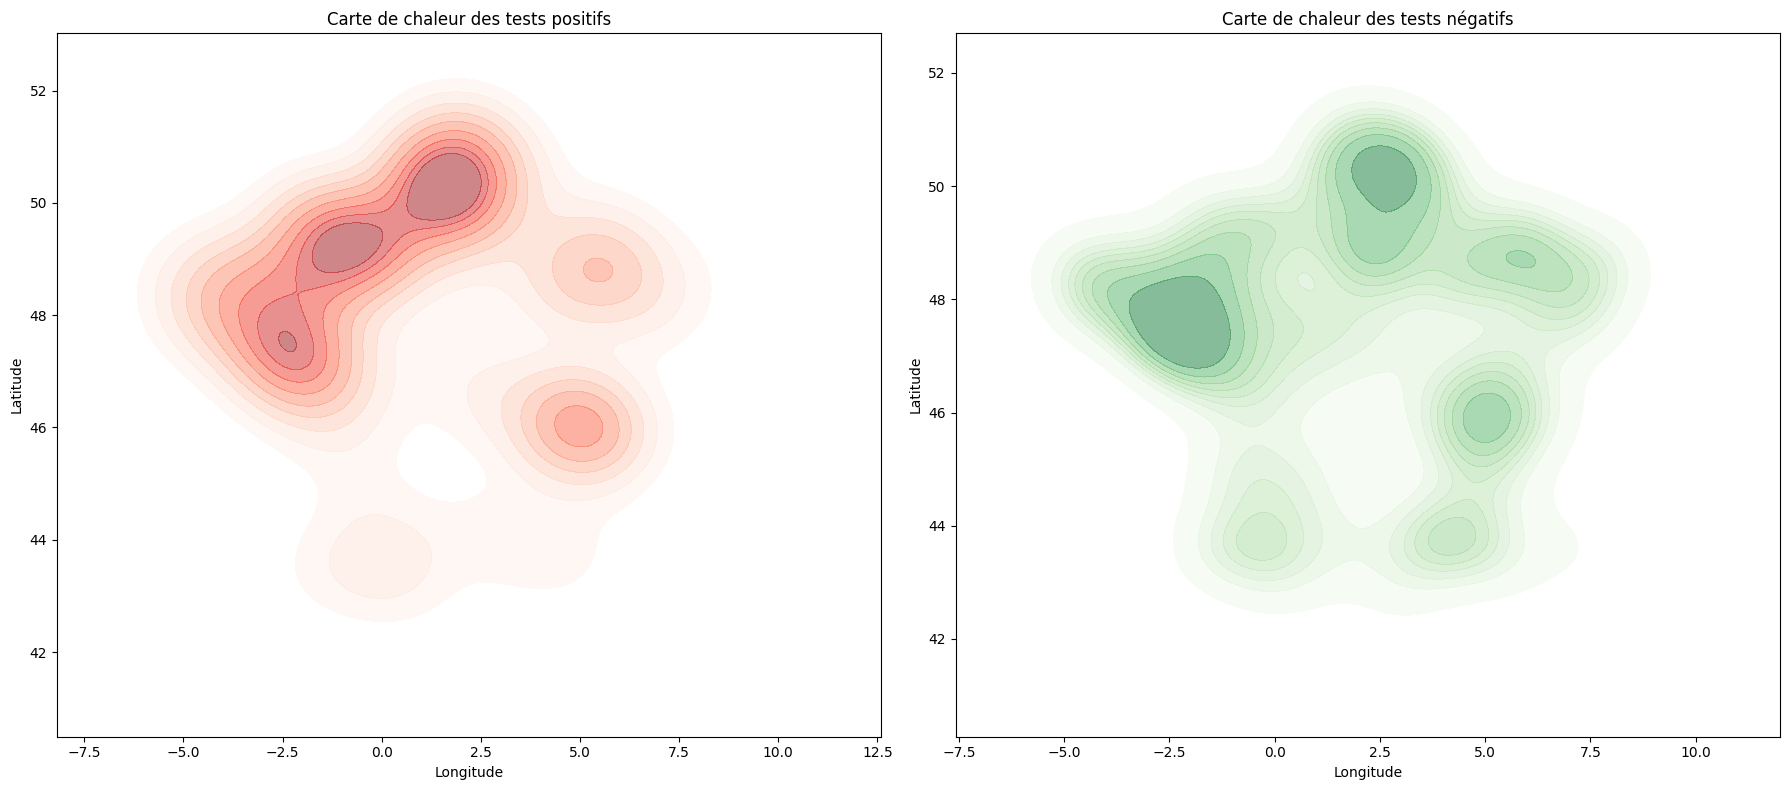

In [68]:
# CARTE DE CHALEUR POUR VISUALISER LA DENSITE DES TESTS POSITIFS ET NEGATIFS


fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Carte de densité des tests positifs
sns.kdeplot(
    x=longitudes[df_filtered['Test_PCR_positif']],
    y=latitudes[df_filtered['Test_PCR_positif']],
    cmap="Reds", fill=True, alpha=0.5, ax=ax[0]
)
ax[0].set_title('Carte de chaleur des tests positifs')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Carte de densité des tests négatifs
sns.kdeplot(
    x=longitudes[~df_filtered['Test_PCR_positif']],
    y=latitudes[~df_filtered['Test_PCR_positif']],
    cmap="Greens", fill=True, alpha=0.5, ax=ax[1]
)
ax[1].set_title('Carte de chaleur des tests négatifs')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

plt.tight_layout()  
plt.show()

### 2.2 Comparaison saisonnière

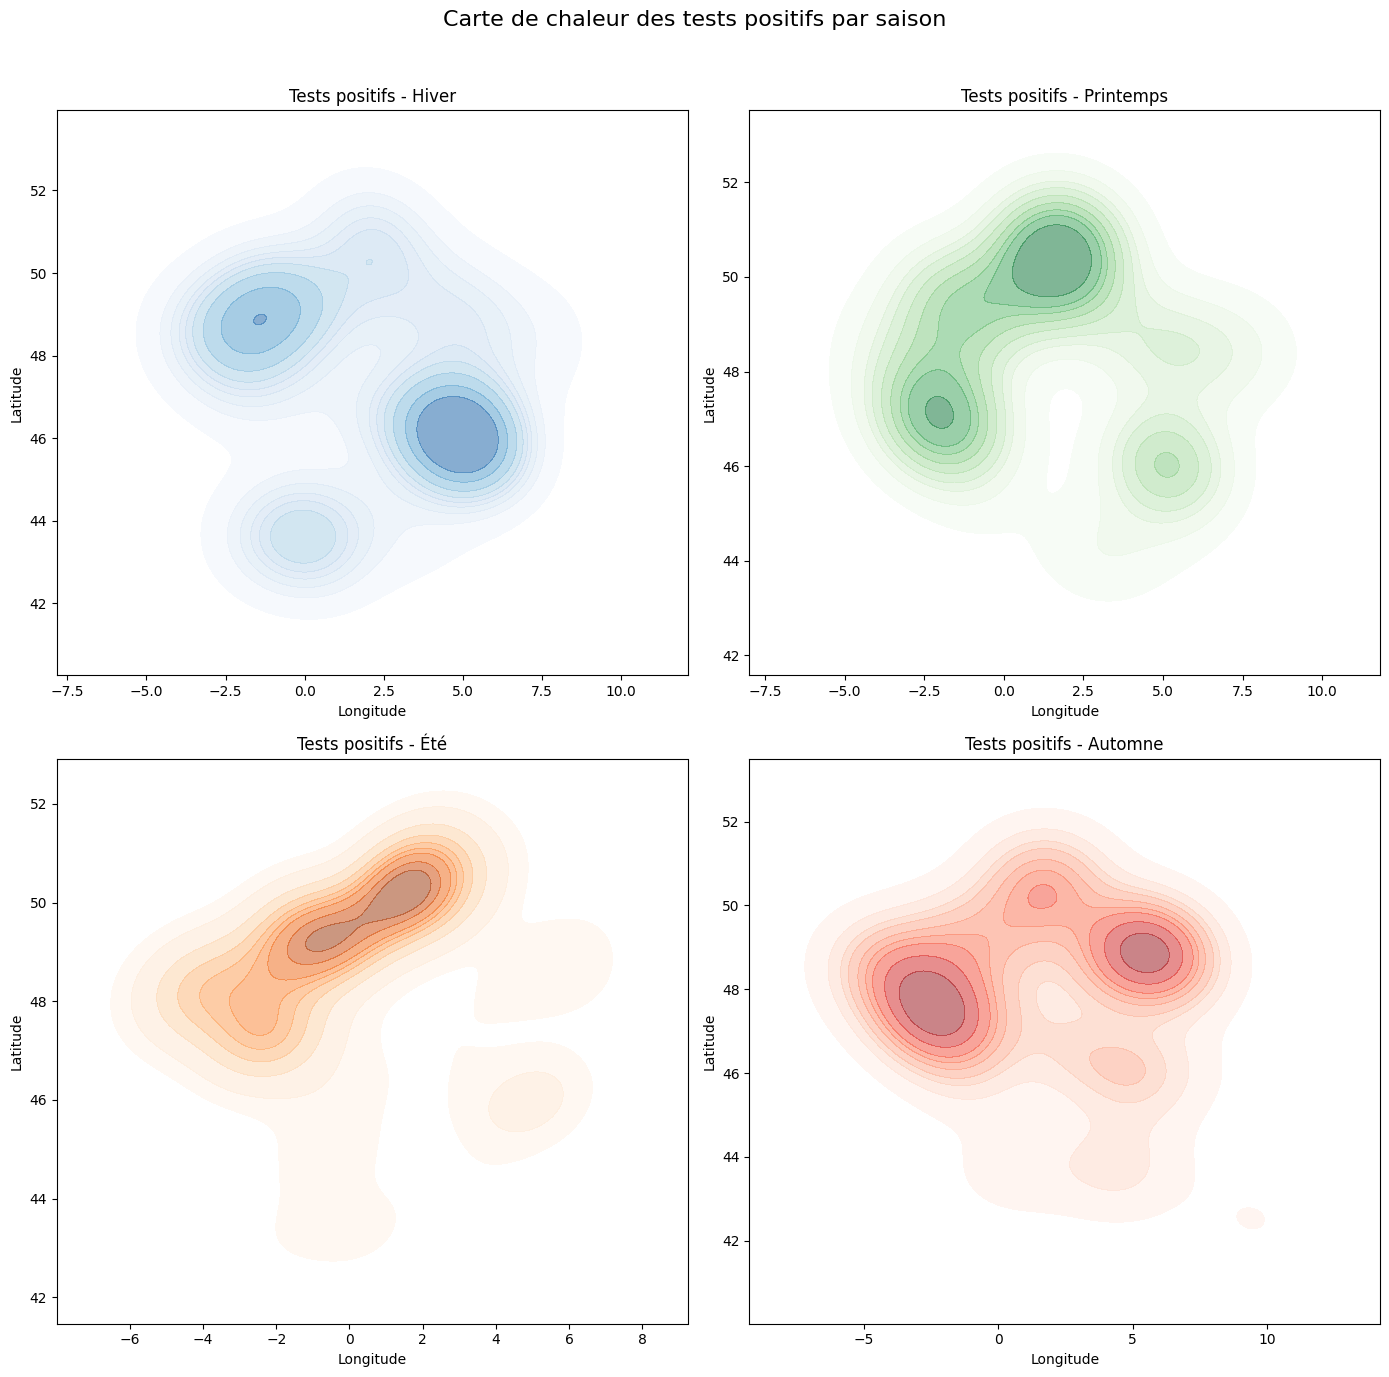

In [69]:
# CARTE DE COMPARAISON SAISONNIERE

transformer = Transformer.from_crs('epsg:2154', 'epsg:4326', always_xy=True)

df_filtered = df.dropna(subset=['X_localisation', 'Y_localisation', 'Nombre_oiseaux_analyses', 'Test_PCR_positif', 'Date_observation']).copy()

longitudes, latitudes = transformer.transform(df_filtered['X_localisation'].values, df_filtered['Y_localisation'].values)

df_filtered['Longitude'] = longitudes
df_filtered['Latitude'] = latitudes

df_filtered['Saison'] = df_filtered['Date_observation'].dt.month % 12 // 3 + 1
saisons = {1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'}
df_filtered['Saison'] = df_filtered['Saison'].map(saisons)

palettes_saisons = {
    'Hiver': 'Blues',
    'Printemps': 'Greens',
    'Été': 'Oranges',
    'Automne': 'Reds'
}

fig, axs = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle('Carte de chaleur des tests positifs par saison', fontsize=16)

for (saison, cmap), ax in zip(palettes_saisons.items(), axs.ravel()):
    sns.kdeplot(
        x=df_filtered[(df_filtered['Test_PCR_positif']) & (df_filtered['Saison'] == saison)]['Longitude'],
        y=df_filtered[(df_filtered['Test_PCR_positif']) & (df_filtered['Saison'] == saison)]['Latitude'],
        cmap=cmap, fill=True, alpha=0.5, ax=ax
    )
    ax.set_title(f'Tests positifs - {saison}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()